In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_json('prices.json')

In [4]:
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,greenFont,"Sep 28, 2022",1664323200,2022-09-28T00:00:00Z,"19,411.0","19,083.4","19,757.8","18,505.3",581.19K,581187,1.73,19410.955078,19083.367188,19757.818359,18505.343750,1.729255
1,redFont,"Sep 27, 2022",1664236800,2022-09-27T00:00:00Z,"19,081.0","19,228.8","20,361.2","18,850.4",660.12K,660115,-0.75,19080.996094,19228.771484,20361.214844,18850.421875,-0.752554
2,greenFont,"Sep 26, 2022",1664150400,2022-09-26T00:00:00Z,"19,225.7","18,803.1","19,304.8","18,695.2",516.03K,516032,2.25,19225.679688,18803.099609,19304.773438,18695.179688,2.246992
3,redFont,"Sep 25, 2022",1664064000,2022-09-25T00:00:00Z,"18,803.2","18,925.1","19,125.1","18,659.6",209.71K,209712,-0.64,18803.173828,18925.144531,19125.066406,18659.615234,-0.644777
4,redFont,"Sep 24, 2022",1663977600,2022-09-24T00:00:00Z,"18,925.2","19,288.4","19,310.6","18,812.0",258.50K,258501,-1.91,18925.199219,19288.394531,19310.556641,18811.955078,-1.909106


In [5]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Sep 28, 2022",19410.955078,19083.367188,19757.818359,18505.343750
1,"Sep 27, 2022",19080.996094,19228.771484,20361.214844,18850.421875
2,"Sep 26, 2022",19225.679688,18803.099609,19304.773438,18695.179688
3,"Sep 25, 2022",18803.173828,18925.144531,19125.066406,18659.615234
4,"Sep 24, 2022",18925.199219,19288.394531,19310.556641,18811.955078


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rowDate        1828 non-null   object 
 1   last_closeRaw  1828 non-null   float64
 2   last_openRaw   1828 non-null   float64
 3   last_maxRaw    1828 non-null   float64
 4   last_minRaw    1828 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.5+ KB


In [7]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({
    'last_closeRaw': 'float',
    'last_openRaw': 'float',
    'last_maxRaw': 'float',
    'last_minRaw': 'float'
})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rowDate        1828 non-null   datetime64[ns]
 1   last_closeRaw  1828 non-null   float64       
 2   last_openRaw   1828 non-null   float64       
 3   last_maxRaw    1828 non-null   float64       
 4   last_minRaw    1828 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.5 KB


In [9]:
data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,2022-09-28,19410.955078,19083.367188,19757.818359,18505.343750
1,2022-09-27,19080.996094,19228.771484,20361.214844,18850.421875
2,2022-09-26,19225.679688,18803.099609,19304.773438,18695.179688
3,2022-09-25,18803.173828,18925.144531,19125.066406,18659.615234
4,2022-09-24,18925.199219,19288.394531,19310.556641,18811.955078


In [10]:
data.rename(
    columns={
        'last_closeRaw': 'close',
        'last_openRaw': 'open',
        'last_maxRaw': 'high',
        'last_minRaw': 'low',
        'rowDate': 'Date'
    },
    inplace=True
)

In [11]:
data.head()

,Date,close,open,high,low
0,2022-09-28,19410.955078,19083.367188,19757.818359,18505.343750
1,2022-09-27,19080.996094,19228.771484,20361.214844,18850.421875
2,2022-09-26,19225.679688,18803.099609,19304.773438,18695.179688
3,2022-09-25,18803.173828,18925.144531,19125.066406,18659.615234
4,2022-09-24,18925.199219,19288.394531,19310.556641,18811.955078


In [12]:
data.set_index('Date', inplace=True)

In [14]:
btc_prices = pd.DataFrame(data['close']).rename(columns={ 'close': 'Price' })

In [15]:
btc_prices.head()

,Price
Date,
2022-09-28,19410.955078
2022-09-27,19080.996094
2022-09-26,19225.679688
2022-09-25,18803.173828
2022-09-24,18925.199219


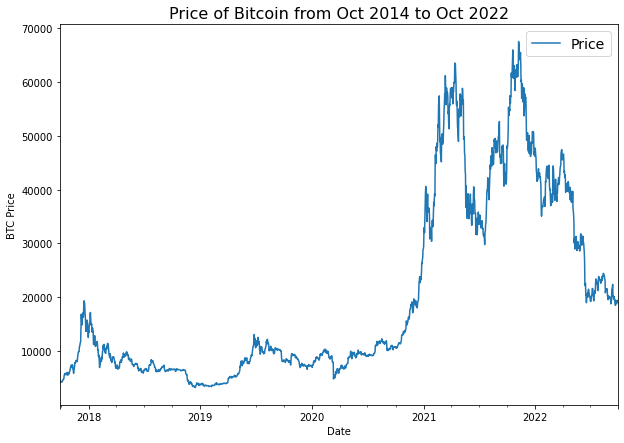

In [16]:
# Visualize closing prices
import matplotlib.pyplot as plt

btc_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

In [21]:
# Sort ascending order of prices
btc_prices.sort_values('Date', inplace=True)
btc_prices.head()

,Price
Date,
2017-09-27,4212.200195
2017-09-28,4195.649902
2017-09-29,4172.790039
2017-09-30,4360.620117
2017-10-01,4403.089844


In [22]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices['Price'].to_numpy()

In [23]:
timesteps, prices

(array(['2017-09-27T00:00:00.000000000', '2017-09-28T00:00:00.000000000',
        '2017-09-29T00:00:00.000000000', ...,
        '2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([ 4212.20019531,  4195.64990234,  4172.79003906, ...,
        19225.6796875 , 19080.99609375, 19410.95507812]))

In [24]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1462,), (366,), (1462,), (366,))

In [26]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

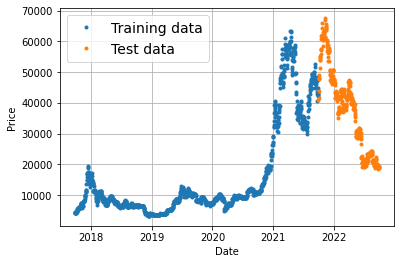

In [27]:
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Test data')